In [1]:
import numpy as p
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#df = pd.read_csv("./data/winequaltiy-white.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/wine+quality/winequality-white.csv', sep=';')

Mounted at /content/drive


In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### EDA 

In [ ]:
# the problem is multiclass classification with 7 unique distnict classes

In [ ]:
df.describe()

# observed that scale differences are massive.
#some are between 0.0 to 0.3
#some are between 8 to 14
# and some of them are 0 to 450 so we gon use log transformations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
print("shape: ", df.shape)
display(df.dtypes)
display(df.isna().sum())

shape:  (4898, 12)


,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
# we dont have missing values plus all are numerical cols
#total sulfur dioxide maybe needed for scaling

##### Dsitribution graph for each column

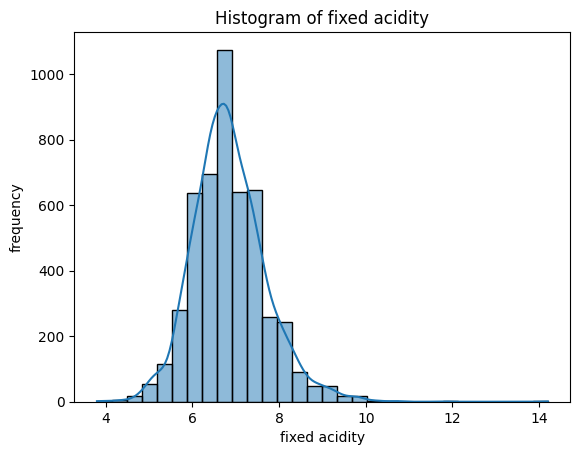

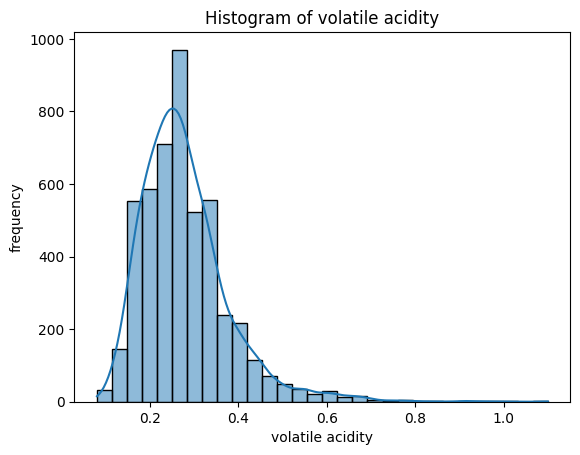

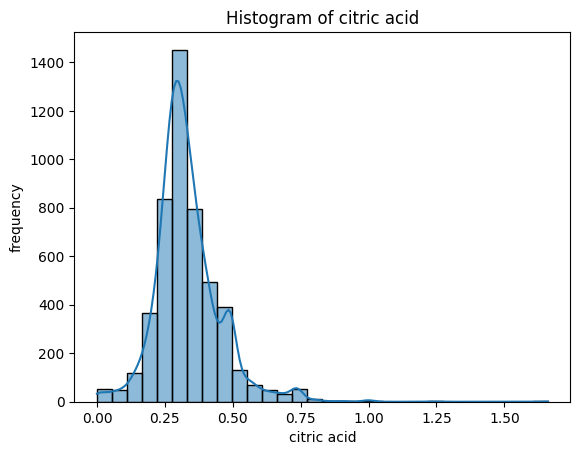

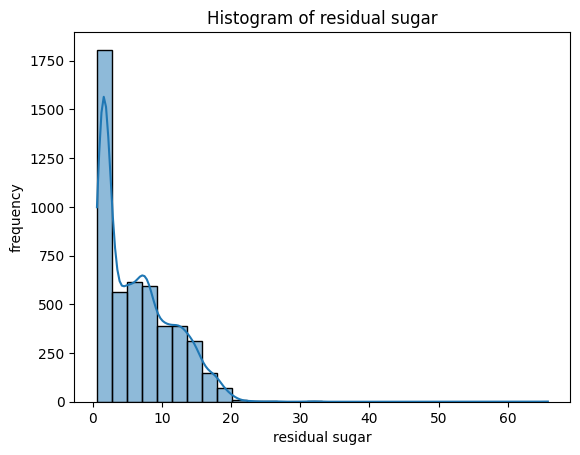

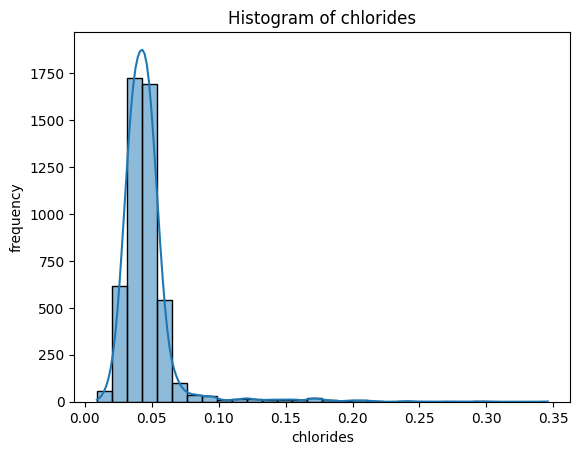

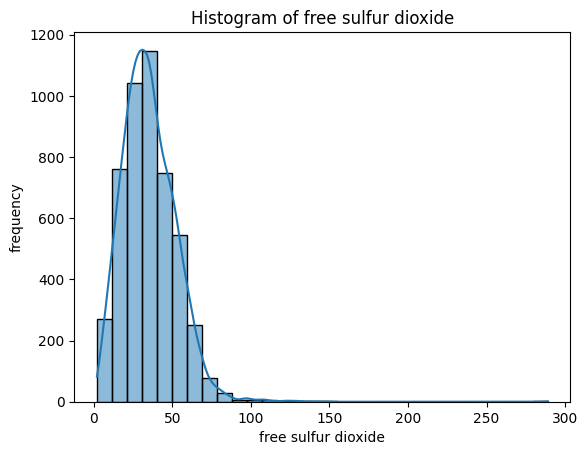

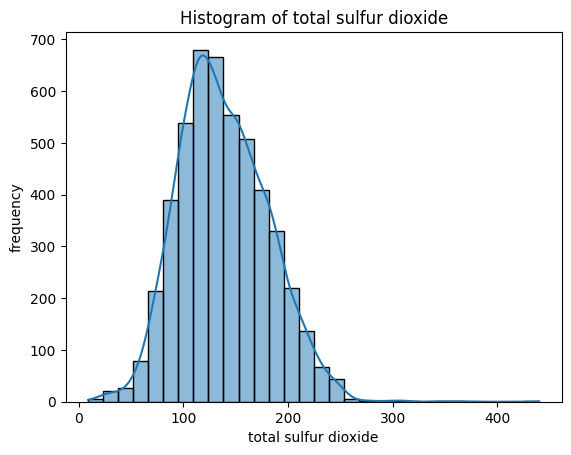

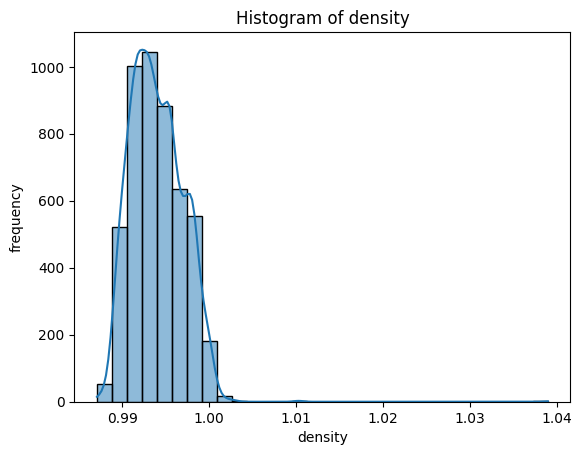

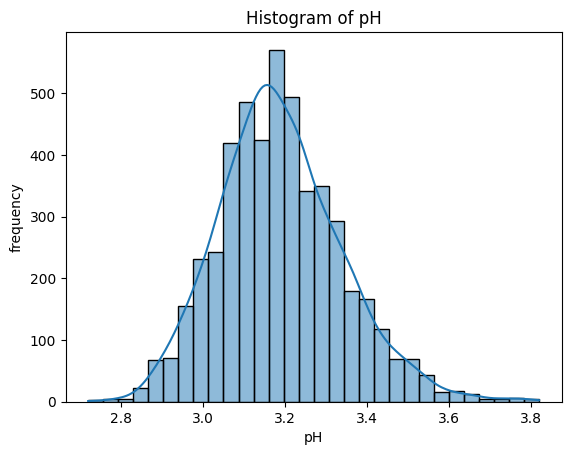

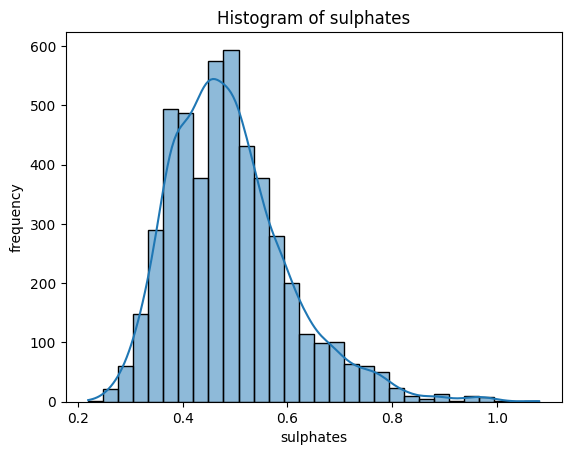

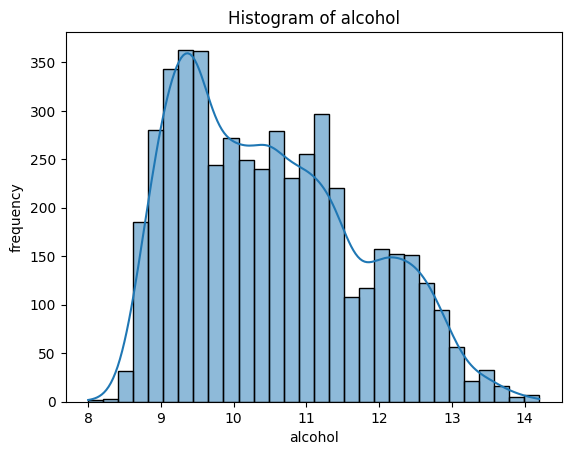

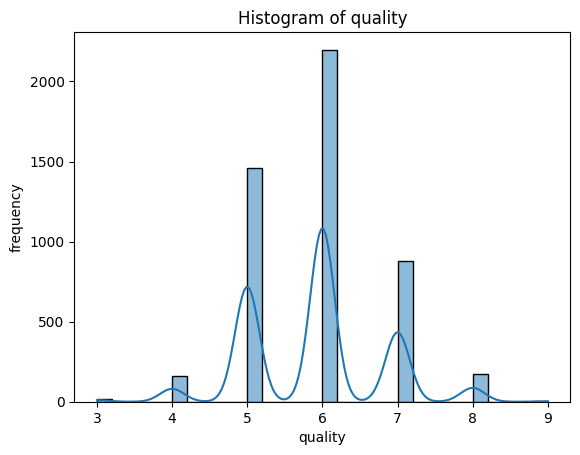

In [6]:
# since we only have numeric cols wecan plot distribution graph for each col

for col in df:
    plt.figure()
    sns.histplot(df[col], kde = True, bins =30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

In [7]:
corr = df.corr(numeric_only = True)["quality"].sort_values(ascending=False)
corr

,quality
quality,1.000000
alcohol,0.435575
pH,0.099427
sulphates,0.053678
free sulfur dioxide,0.008158
citric acid,-0.009209
residual sugar,-0.097577
fixed acidity,-0.113663
total sulfur dioxide,-0.174737
volatile acidity,-0.194723


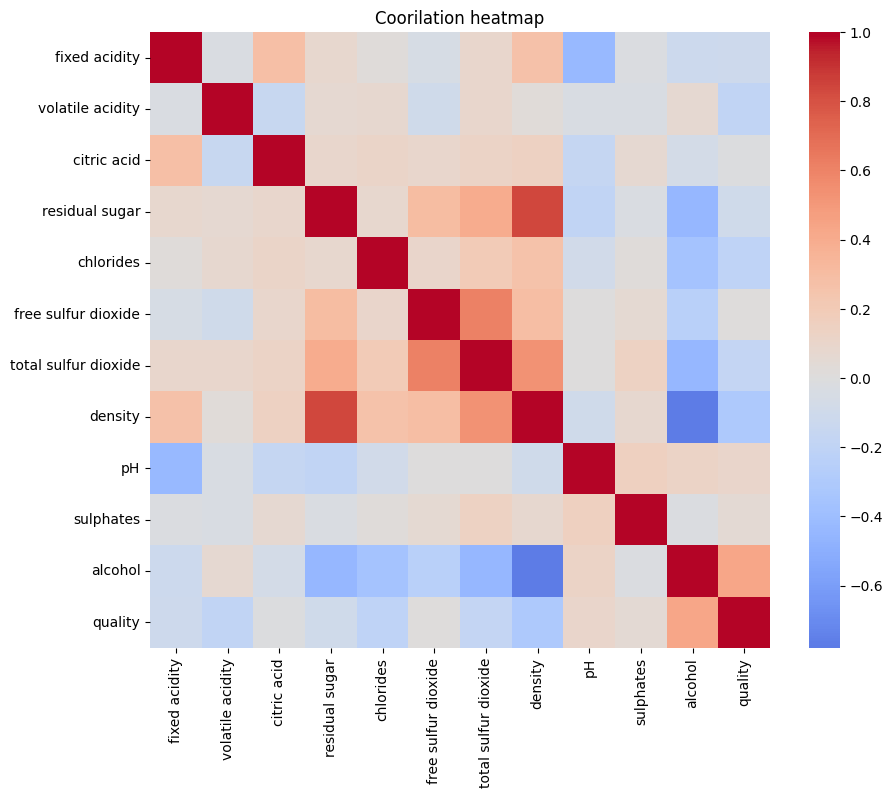

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only = True), cmap= "coolwarm", center = 0)
plt.title("Coorilation heatmap")
plt.show()

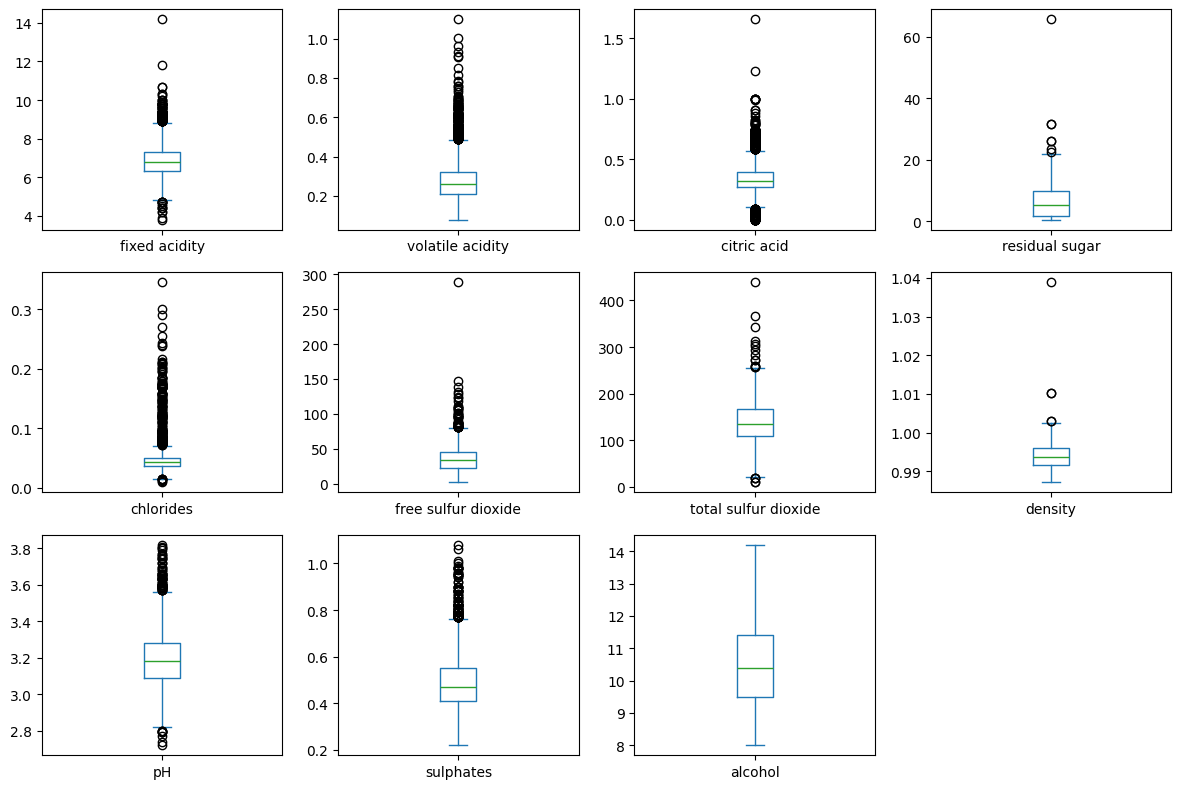

In [8]:
df.drop(columns=['quality']).plot(kind='box', subplots=True, layout=(3,4), figsize=(12,8), sharey=False)
plt.tight_layout()
plt.show()

##### Findings from the boxplot above 
##### as we can see the "resedual sugar" column or "chlorides" the boxes are squashed th the bottom with long trail of dots at the top means its right-skewwed data 
##### (most of the wines have low value but some of them are high)
##### the best approach will be to using "RobustScaler"for scaling because it uses median and IRQ so it doesn't get fooled by the crazy outliers
##### for the massive tails we gon use log Transformations, scaling won't fix the shape of the data but transformations will